In [17]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error


In [18]:
df_modeling = pd.read_csv(filepath_or_buffer= "../data/Dataset_for_modeling.csv") 
df_modeling.head()

,Rating,Rating Count,Free,Price,Ad Supported,In App Purchases,Editors Choice,Category_Action,Category_Adventure,Category_Arcade,...,Category_Trivia,Category_Video Players & Editors,Category_Weather,Category_Word,Content_Rating_Adults only 18+,Content_Rating_Everyone,Content_Rating_Everyone 10+,Content_Rating_Mature 17+,Content_Rating_Teen,Content_Rating_Unrated
0,3.9,68.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.0,0.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.3,918.0,1,0.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,5.0,6.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,830.0,1,0.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Train-Test-Split

In [19]:
X = df_modeling.drop(columns= 'Rating')
y = df_modeling['Rating']

In [20]:
X.shape

(9663, 60)

In [21]:
y.shape

(9663,)

In [22]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.2, random_state = 1234)

In [23]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model',LinearRegression())
])

Params = [{
            'model__fit_intercept': [True, False],
            'model__positive'  : [2, 4, 6, 8],
            'model__copy_X' : [10, 20, 30, 40, 50],
            'model__n_jobs'    : [4,6,8,10]
        }]

grid_search = GridSearchCV(estimator=pipeline, param_grid=Params, cv=5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:59

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', LinearRegression())]),
             param_grid=[{'model__copy_X': [10, 20, 30, 40, 50],
                          'model__fit_intercept': [True, False],
                          'model__n_jobs': [4, 6, 8, 10],
                          'model__positive': [2, 4, 6, 8]}],
             verbose=1)

In [24]:
print("Best parameters are %s with a score of %0.2f"
% (grid_search.best_params_, grid_search.best_score_))

Best parameters are {'model__copy_X': 10, 'model__fit_intercept': True, 'model__n_jobs': 4, 'model__positive': 2} with a score of 0.06


We run the model withouth the pca. We can see that the model copy X reach the minimum range,
the model__n_jobs reach the minimum range, the model fit_intercept reach True  and the model positive reach the minimum range. 
We are going to rerun the model with different hyperparameters range and add pca. 

In [25]:
y_pred1 = grid_search.predict(X_test)

In [26]:
grid_search.score(X_test, y_test)

-8.372584500867757e+19

In [27]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model',LinearRegression())
])

Params = [{
            'model__fit_intercept': [True, False],
            'model__positive'  : [None, 1],
            'model__copy_X' : [2, 4, 6, 8],
            'model__n_jobs'    : [1, 2, 3]
        }]

grid_search = GridSearchCV(estimator=pipeline, param_grid=Params, cv=5, verbose = 2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END model__copy_X=2, model__fit_intercept=True, model__n_jobs=1, model__positive=None; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=True, model__n_jobs=1, model__positive=None; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=True, model__n_jobs=1, model__positive=None; total time=   0.0s


[CV] END model__copy_X=2, model__fit_intercept=True, model__n_jobs=1, model__positive=None; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=True, model__n_jobs=1, model__positive=None; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:59

[CV] END model__copy_X=2, model__fit_intercept=True, model__n_jobs=1, model__positive=1; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=True, model__n_jobs=1, model__positive=1; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=True, model__n_jobs=1, model__positive=1; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[CV] END model__copy_X=2, model__fit_intercept=True, model__n_jobs=1, model__positive=1; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=True, model__n_jobs=1, model__positive=1; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=True, model__n_jobs=2, model__positive=None; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=True, model__n_jobs=2, model__positive=None; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=True, model__n_jobs=2, model__positive=None; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:59

[CV] END model__copy_X=2, model__fit_intercept=True, model__n_jobs=2, model__positive=None; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=True, model__n_jobs=2, model__positive=None; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=True, model__n_jobs=2, model__positive=1; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=True, model__n_jobs=2, model__positive=1; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[CV] END model__copy_X=2, model__fit_intercept=True, model__n_jobs=2, model__positive=1; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=True, model__n_jobs=2, model__positive=1; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=True, model__n_jobs=2, model__positive=1; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=True, model__n_jobs=3, model__positive=None; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=True, model__n_jobs=3, model__positive=None; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:59

[CV] END model__copy_X=2, model__fit_intercept=True, model__n_jobs=3, model__positive=None; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=True, model__n_jobs=3, model__positive=None; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=True, model__n_jobs=3, model__positive=None; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=True, model__n_jobs=3, model__positive=1; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=True, model__n_jobs=3, model__positive=1; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=True, model__n_jobs=3, model__positive=1; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=True, model__n_jobs=3, model__positive=1; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[CV] END model__copy_X=2, model__fit_intercept=True, model__n_jobs=3, model__positive=1; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=False, model__n_jobs=1, model__positive=None; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=False, model__n_jobs=1, model__positive=None; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=False, model__n_jobs=1, model__positive=None; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=False, model__n_jobs=1, model__positive=None; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=False, model__n_jobs=1, model__positive=None; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:59

[CV] END model__copy_X=2, model__fit_intercept=False, model__n_jobs=1, model__positive=1; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=False, model__n_jobs=1, model__positive=1; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=False, model__n_jobs=1, model__positive=1; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[CV] END model__copy_X=2, model__fit_intercept=False, model__n_jobs=1, model__positive=1; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=False, model__n_jobs=1, model__positive=1; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=False, model__n_jobs=2, model__positive=None; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=False, model__n_jobs=2, model__positive=None; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=False, model__n_jobs=2, model__positive=None; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:59

[CV] END model__copy_X=2, model__fit_intercept=False, model__n_jobs=2, model__positive=None; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=False, model__n_jobs=2, model__positive=None; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=False, model__n_jobs=2, model__positive=1; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=False, model__n_jobs=2, model__positive=1; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[CV] END model__copy_X=2, model__fit_intercept=False, model__n_jobs=2, model__positive=1; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=False, model__n_jobs=2, model__positive=1; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=False, model__n_jobs=2, model__positive=1; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=False, model__n_jobs=3, model__positive=None; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[CV] END model__copy_X=2, model__fit_intercept=False, model__n_jobs=3, model__positive=None; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=False, model__n_jobs=3, model__positive=None; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=False, model__n_jobs=3, model__positive=None; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=False, model__n_jobs=3, model__positive=None; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=False, model__n_jobs=3, model__positive=1; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:59

[CV] END model__copy_X=2, model__fit_intercept=False, model__n_jobs=3, model__positive=1; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=False, model__n_jobs=3, model__positive=1; total time=   0.0s
[CV] END model__copy_X=2, model__fit_intercept=False, model__n_jobs=3, model__positive=1; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[CV] END model__copy_X=2, model__fit_intercept=False, model__n_jobs=3, model__positive=1; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=True, model__n_jobs=1, model__positive=None; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=True, model__n_jobs=1, model__positive=None; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=True, model__n_jobs=1, model__positive=None; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=True, model__n_jobs=1, model__positive=None; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=True, model__n_jobs=1, model__positive=None; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:59

[CV] END model__copy_X=4, model__fit_intercept=True, model__n_jobs=1, model__positive=1; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=True, model__n_jobs=1, model__positive=1; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=True, model__n_jobs=1, model__positive=1; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[CV] END model__copy_X=4, model__fit_intercept=True, model__n_jobs=1, model__positive=1; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=True, model__n_jobs=1, model__positive=1; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=True, model__n_jobs=2, model__positive=None; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=True, model__n_jobs=2, model__positive=None; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:59

[CV] END model__copy_X=4, model__fit_intercept=True, model__n_jobs=2, model__positive=None; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=True, model__n_jobs=2, model__positive=None; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=True, model__n_jobs=2, model__positive=None; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=True, model__n_jobs=2, model__positive=1; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[CV] END model__copy_X=4, model__fit_intercept=True, model__n_jobs=2, model__positive=1; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=True, model__n_jobs=2, model__positive=1; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=True, model__n_jobs=2, model__positive=1; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[CV] END model__copy_X=4, model__fit_intercept=True, model__n_jobs=2, model__positive=1; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=True, model__n_jobs=3, model__positive=None; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=True, model__n_jobs=3, model__positive=None; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=True, model__n_jobs=3, model__positive=None; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=True, model__n_jobs=3, model__positive=None; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=True, model__n_jobs=3, model__positive=None; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:59

[CV] END model__copy_X=4, model__fit_intercept=True, model__n_jobs=3, model__positive=1; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=True, model__n_jobs=3, model__positive=1; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=True, model__n_jobs=3, model__positive=1; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[CV] END model__copy_X=4, model__fit_intercept=True, model__n_jobs=3, model__positive=1; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=True, model__n_jobs=3, model__positive=1; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=False, model__n_jobs=1, model__positive=None; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=False, model__n_jobs=1, model__positive=None; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=False, model__n_jobs=1, model__positive=None; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:59

[CV] END model__copy_X=4, model__fit_intercept=False, model__n_jobs=1, model__positive=None; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=False, model__n_jobs=1, model__positive=None; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=False, model__n_jobs=1, model__positive=1; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=False, model__n_jobs=1, model__positive=1; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[CV] END model__copy_X=4, model__fit_intercept=False, model__n_jobs=1, model__positive=1; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=False, model__n_jobs=1, model__positive=1; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=False, model__n_jobs=1, model__positive=1; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=False, model__n_jobs=2, model__positive=None; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:59

[CV] END model__copy_X=4, model__fit_intercept=False, model__n_jobs=2, model__positive=None; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=False, model__n_jobs=2, model__positive=None; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=False, model__n_jobs=2, model__positive=None; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=False, model__n_jobs=2, model__positive=None; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=False, model__n_jobs=2, model__positive=1; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[CV] END model__copy_X=4, model__fit_intercept=False, model__n_jobs=2, model__positive=1; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=False, model__n_jobs=2, model__positive=1; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=False, model__n_jobs=2, model__positive=1; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[CV] END model__copy_X=4, model__fit_intercept=False, model__n_jobs=2, model__positive=1; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=False, model__n_jobs=3, model__positive=None; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=False, model__n_jobs=3, model__positive=None; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=False, model__n_jobs=3, model__positive=None; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=False, model__n_jobs=3, model__positive=None; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[CV] END model__copy_X=4, model__fit_intercept=False, model__n_jobs=3, model__positive=None; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=False, model__n_jobs=3, model__positive=1; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=False, model__n_jobs=3, model__positive=1; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=False, model__n_jobs=3, model__positive=1; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[CV] END model__copy_X=4, model__fit_intercept=False, model__n_jobs=3, model__positive=1; total time=   0.0s
[CV] END model__copy_X=4, model__fit_intercept=False, model__n_jobs=3, model__positive=1; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=True, model__n_jobs=1, model__positive=None; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=True, model__n_jobs=1, model__positive=None; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=True, model__n_jobs=1, model__positive=None; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:59

[CV] END model__copy_X=6, model__fit_intercept=True, model__n_jobs=1, model__positive=None; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=True, model__n_jobs=1, model__positive=None; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=True, model__n_jobs=1, model__positive=1; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=True, model__n_jobs=1, model__positive=1; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[CV] END model__copy_X=6, model__fit_intercept=True, model__n_jobs=1, model__positive=1; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=True, model__n_jobs=1, model__positive=1; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=True, model__n_jobs=1, model__positive=1; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:59

[CV] END model__copy_X=6, model__fit_intercept=True, model__n_jobs=2, model__positive=None; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=True, model__n_jobs=2, model__positive=None; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=True, model__n_jobs=2, model__positive=None; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=True, model__n_jobs=2, model__positive=None; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=True, model__n_jobs=2, model__positive=None; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=True, model__n_jobs=2, model__positive=1; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=True, model__n_jobs=2, model__positive=1; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=True, model__n_jobs=2, model__positive=1; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[CV] END model__copy_X=6, model__fit_intercept=True, model__n_jobs=2, model__positive=1; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=True, model__n_jobs=2, model__positive=1; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=True, model__n_jobs=3, model__positive=None; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=True, model__n_jobs=3, model__positive=None; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=True, model__n_jobs=3, model__positive=None; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:59

[CV] END model__copy_X=6, model__fit_intercept=True, model__n_jobs=3, model__positive=None; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=True, model__n_jobs=3, model__positive=None; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=True, model__n_jobs=3, model__positive=1; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=True, model__n_jobs=3, model__positive=1; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[CV] END model__copy_X=6, model__fit_intercept=True, model__n_jobs=3, model__positive=1; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=True, model__n_jobs=3, model__positive=1; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=True, model__n_jobs=3, model__positive=1; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=False, model__n_jobs=1, model__positive=None; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[CV] END model__copy_X=6, model__fit_intercept=False, model__n_jobs=1, model__positive=None; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=False, model__n_jobs=1, model__positive=None; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=False, model__n_jobs=1, model__positive=None; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=False, model__n_jobs=1, model__positive=None; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=False, model__n_jobs=1, model__positive=1; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:59

[CV] END model__copy_X=6, model__fit_intercept=False, model__n_jobs=1, model__positive=1; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=False, model__n_jobs=1, model__positive=1; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=False, model__n_jobs=1, model__positive=1; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[CV] END model__copy_X=6, model__fit_intercept=False, model__n_jobs=1, model__positive=1; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=False, model__n_jobs=2, model__positive=None; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=False, model__n_jobs=2, model__positive=None; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=False, model__n_jobs=2, model__positive=None; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=False, model__n_jobs=2, model__positive=None; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=False, model__n_jobs=2, model__positive=None; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:59

[CV] END model__copy_X=6, model__fit_intercept=False, model__n_jobs=2, model__positive=1; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=False, model__n_jobs=2, model__positive=1; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=False, model__n_jobs=2, model__positive=1; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[CV] END model__copy_X=6, model__fit_intercept=False, model__n_jobs=2, model__positive=1; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=False, model__n_jobs=2, model__positive=1; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=False, model__n_jobs=3, model__positive=None; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=False, model__n_jobs=3, model__positive=None; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:59

[CV] END model__copy_X=6, model__fit_intercept=False, model__n_jobs=3, model__positive=None; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=False, model__n_jobs=3, model__positive=None; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=False, model__n_jobs=3, model__positive=None; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=False, model__n_jobs=3, model__positive=1; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[CV] END model__copy_X=6, model__fit_intercept=False, model__n_jobs=3, model__positive=1; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=False, model__n_jobs=3, model__positive=1; total time=   0.0s
[CV] END model__copy_X=6, model__fit_intercept=False, model__n_jobs=3, model__positive=1; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[CV] END model__copy_X=6, model__fit_intercept=False, model__n_jobs=3, model__positive=1; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=True, model__n_jobs=1, model__positive=None; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=True, model__n_jobs=1, model__positive=None; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=True, model__n_jobs=1, model__positive=None; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=True, model__n_jobs=1, model__positive=None; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=True, model__n_jobs=1, model__positive=None; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:59

[CV] END model__copy_X=8, model__fit_intercept=True, model__n_jobs=1, model__positive=1; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=True, model__n_jobs=1, model__positive=1; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=True, model__n_jobs=1, model__positive=1; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[CV] END model__copy_X=8, model__fit_intercept=True, model__n_jobs=1, model__positive=1; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=True, model__n_jobs=1, model__positive=1; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=True, model__n_jobs=2, model__positive=None; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=True, model__n_jobs=2, model__positive=None; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:59

[CV] END model__copy_X=8, model__fit_intercept=True, model__n_jobs=2, model__positive=None; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=True, model__n_jobs=2, model__positive=None; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=True, model__n_jobs=2, model__positive=None; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=True, model__n_jobs=2, model__positive=1; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=True, model__n_jobs=2, model__positive=1; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=True, model__n_jobs=2, model__positive=1; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=True, model__n_jobs=2, model__positive=1; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[CV] END model__copy_X=8, model__fit_intercept=True, model__n_jobs=2, model__positive=1; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=True, model__n_jobs=3, model__positive=None; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=True, model__n_jobs=3, model__positive=None; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=True, model__n_jobs=3, model__positive=None; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=True, model__n_jobs=3, model__positive=None; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=True, model__n_jobs=3, model__positive=None; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:59

[CV] END model__copy_X=8, model__fit_intercept=True, model__n_jobs=3, model__positive=1; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=True, model__n_jobs=3, model__positive=1; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=True, model__n_jobs=3, model__positive=1; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[CV] END model__copy_X=8, model__fit_intercept=True, model__n_jobs=3, model__positive=1; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=True, model__n_jobs=3, model__positive=1; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=False, model__n_jobs=1, model__positive=None; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=False, model__n_jobs=1, model__positive=None; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=False, model__n_jobs=1, model__positive=None; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=False, model__n_jobs=1, model__positive=None; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:59

[CV] END model__copy_X=8, model__fit_intercept=False, model__n_jobs=1, model__positive=None; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=False, model__n_jobs=1, model__positive=1; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=False, model__n_jobs=1, model__positive=1; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=False, model__n_jobs=1, model__positive=1; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[CV] END model__copy_X=8, model__fit_intercept=False, model__n_jobs=1, model__positive=1; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=False, model__n_jobs=1, model__positive=1; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=False, model__n_jobs=2, model__positive=None; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=False, model__n_jobs=2, model__positive=None; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=False, model__n_jobs=2, model__positive=None; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=False, model__n_jobs=2, model__positive=None; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:59

[CV] END model__copy_X=8, model__fit_intercept=False, model__n_jobs=2, model__positive=None; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=False, model__n_jobs=2, model__positive=1; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=False, model__n_jobs=2, model__positive=1; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[CV] END model__copy_X=8, model__fit_intercept=False, model__n_jobs=2, model__positive=1; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=False, model__n_jobs=2, model__positive=1; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=False, model__n_jobs=2, model__positive=1; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=False, model__n_jobs=3, model__positive=None; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:59

[CV] END model__copy_X=8, model__fit_intercept=False, model__n_jobs=3, model__positive=None; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=False, model__n_jobs=3, model__positive=None; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=False, model__n_jobs=3, model__positive=None; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=False, model__n_jobs=3, model__positive=None; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=False, model__n_jobs=3, model__positive=1; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[CV] END model__copy_X=8, model__fit_intercept=False, model__n_jobs=3, model__positive=1; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=False, model__n_jobs=3, model__positive=1; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=False, model__n_jobs=3, model__positive=1; total time=   0.0s
[CV] END model__copy_X=8, model__fit_intercept=False, model__n_jobs=3, model__positive=1; total time=   0.0s


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\base.py", line 115

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('model', LinearRegression())]),
             param_grid=[{'model__copy_X': [2, 4, 6, 8],
                          'model__fit_intercept': [True, False],
                          'model__n_jobs': [1, 2, 3],
                          'model__positive': [None, 1]}],
             verbose=2)

In [28]:
print("Best parameters are %s with a score of %0.2f"
% (grid_search.best_params_, grid_search.best_score_))

Best parameters are {'model__copy_X': 2, 'model__fit_intercept': True, 'model__n_jobs': 1, 'model__positive': 1} with a score of -0.41


For this model the model copy_X is only at 2 (the lowest range), the model fit_intercept reach True, the model n_job is 1, and the model positive is 1. 

In [29]:
y_pred2 = grid_search.predict(X_test)

In [30]:
grid_search.score(X_test, y_test)

-3.1120000234240197e+24

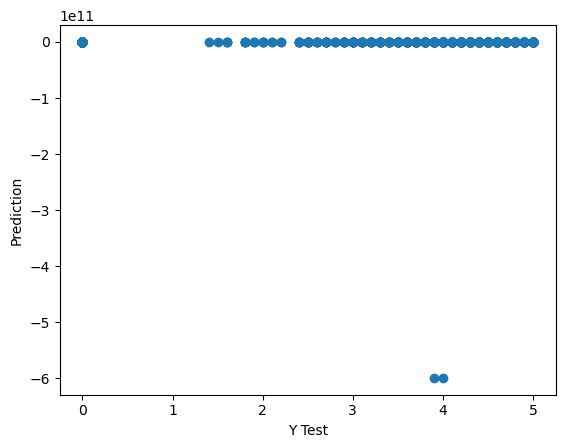

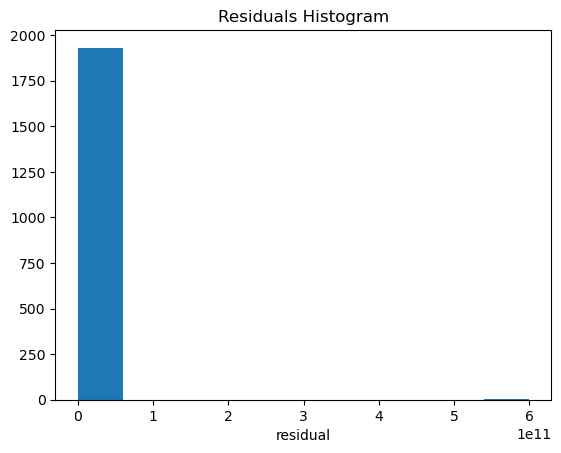

{'whiskers': [<matplotlib.lines.Line2D at 0x2206d762310>,
 'caps': [<matplotlib.lines.Line2D at 0x2206d7634d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2206d761a90>,
 'medians': [<matplotlib.lines.Line2D at 0x2206d76c650>,
 'fliers': [<matplotlib.lines.Line2D at 0x2206d11ce50>,
 'means': []}

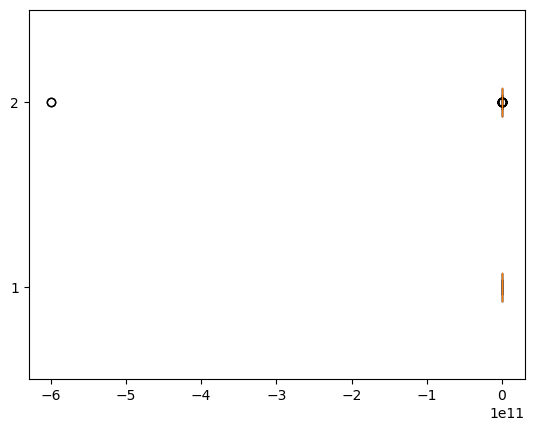

In [31]:
# Print the accuracy
metrics.r2_score(y_test, y_pred1)

plt.scatter(y_test, y_pred1)
plt.xlabel('Y Test')
plt.ylabel('Prediction')
plt.show()

plt.hist([y_test-y_pred1])
plt.title('Residuals Histogram')
plt.xlabel('residual')
plt.show()

plt.boxplot([y_test, y_pred1], vert=False)



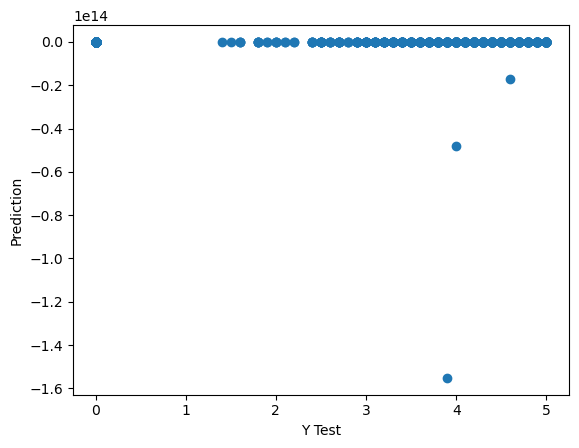

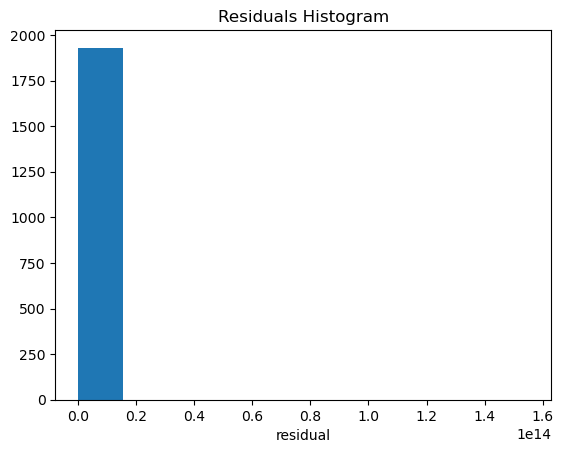

{'whiskers': [<matplotlib.lines.Line2D at 0x2206d698f50>,
 'caps': [<matplotlib.lines.Line2D at 0x2206d6a2310>,
 'boxes': [<matplotlib.lines.Line2D at 0x2206d69a0d0>,
 'medians': [<matplotlib.lines.Line2D at 0x2206d6a1d50>,
 'fliers': [<matplotlib.lines.Line2D at 0x2206d6a2110>,
 'means': []}

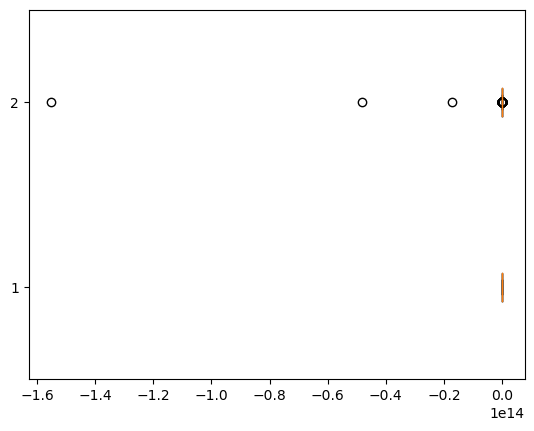

In [32]:
# Print the accuracy
metrics.r2_score(y_test, y_pred2)

plt.scatter(y_test, y_pred2)
plt.xlabel('Y Test')
plt.ylabel('Prediction')
plt.show()

plt.hist([y_test-y_pred2])
plt.title('Residuals Histogram')
plt.xlabel('residual')
plt.show()

plt.boxplot([y_test, y_pred2], vert=False)